<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

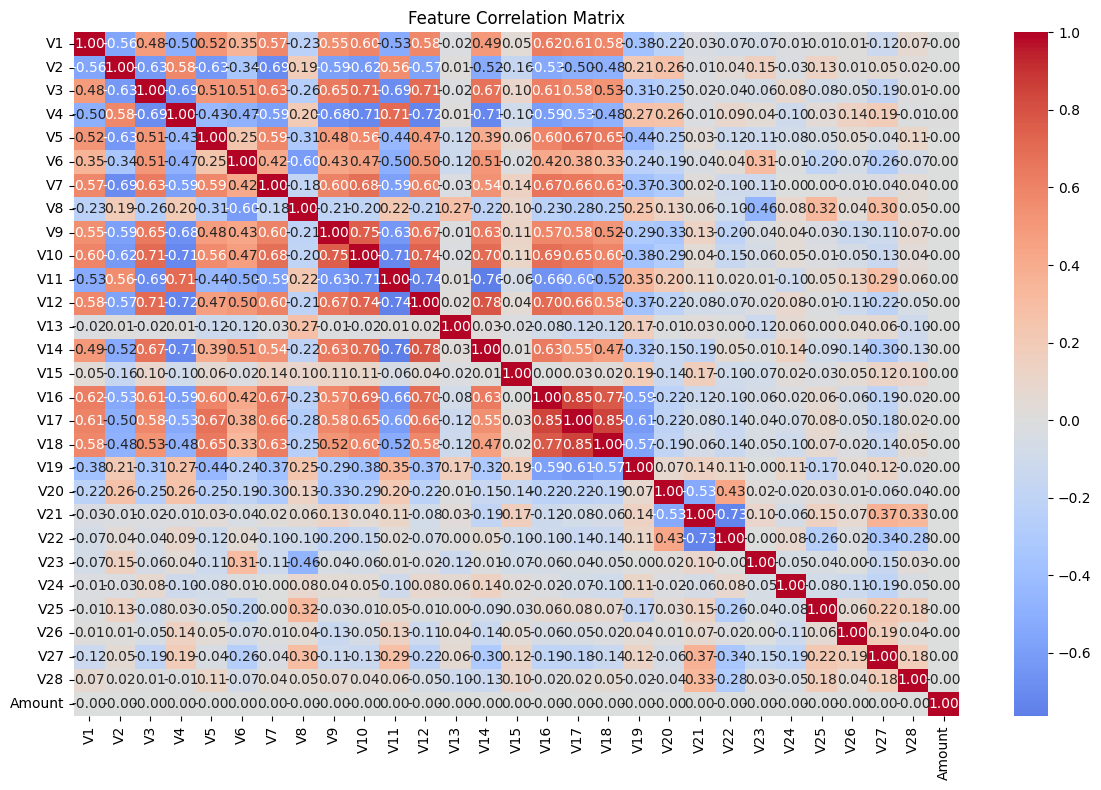

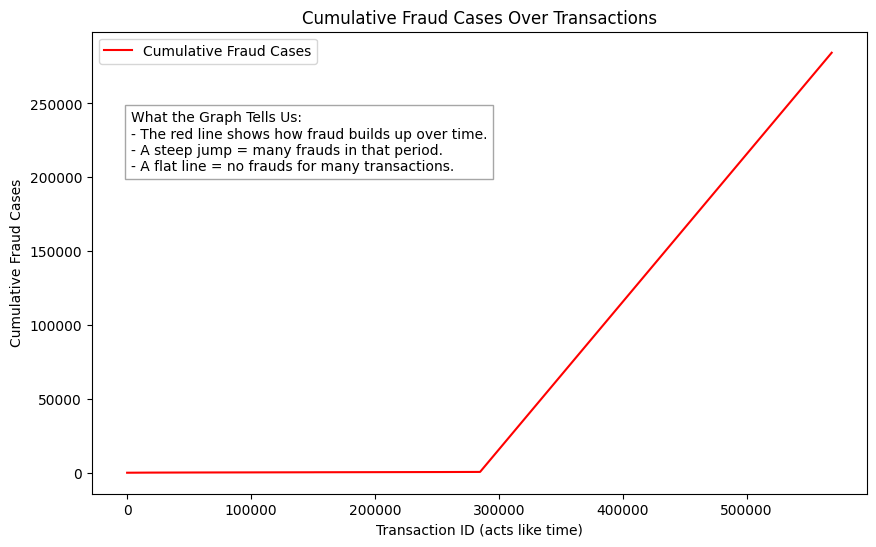

In [1]:
# C-1: Run EDA notebook & generate initial data visualizations
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, PrecisionRecallDisplay, auc, accuracy_score
import joblib
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import (RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, average_precision_score)

# Load dataset
df = pd.read_csv('../data/creditcard_2023.csv')
df.head()

# Dataset info
df.info()
df.isnull().sum()

# Select features and target
x = df.drop(['id','Class'], axis=1, errors='ignore')
y = df['Class']

print(x.columns.tolist())

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

# Heatmap (correlation matrix)
plt.figure(figsize=(12,8))
correlation_matrix= x.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',center =0,fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Cumulative fraud count visualization
df['cumulative_fraud'] = df['Class'].cumsum()
plt.figure(figsize=(10,6))
plt.plot(df['id'], df['cumulative_fraud'], color='red', label="Cumulative Fraud Cases")
plt.title("Cumulative Fraud Cases Over Transactions")
plt.xlabel("Transaction ID (acts like time)")
plt.ylabel("Cumulative Fraud Cases")

description = (
    "What the Graph Tells Us:\n"
    "- The red line shows how fraud builds up over time.\n"
    "- A steep jump = many frauds in that period.\n"
    "- A flat line = no frauds for many transactions."
)
plt.text(0.05, 0.7, description, transform=plt.gca().transAxes, fontsize=10, color="black",
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.legend()
plt.show()



🔹 Baseline Model (Logistic Regression)

Baseline Model Performance (Logistic Regression):
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.9539    0.9776    0.9656     56750
           1     0.9771    0.9529    0.9649     56976

    accuracy                         0.9652    113726
   macro avg     0.9655    0.9653    0.9652    113726
weighted avg     0.9655    0.9652    0.9652    113726

Accuracy      : 0.9652
ROC-AUC Score : 0.9934


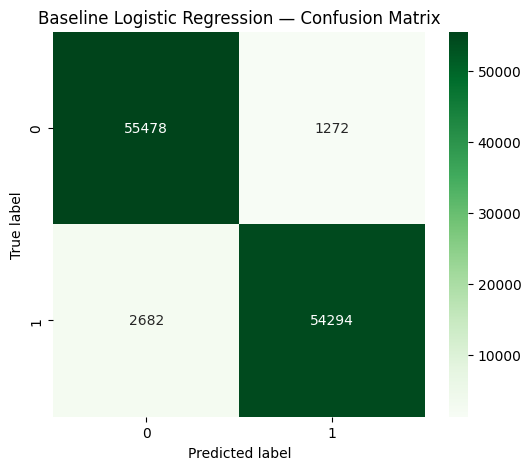

In [2]:
#C-2: Build and Evaluate Baseline Model
# Feature scaling
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

# Create & train the baseline Logistic Regression
baseline = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42)

print("\n🔹 Baseline Model (Logistic Regression)")
baseline.fit(x_train_scaled, y_train)

# Predictions
y_base = baseline.predict(x_test_scaled)
y_base_prob = baseline.predict_proba(x_test_scaled)[:, 1]

# Performance metrics
print("\nBaseline Model Performance (Logistic Regression):")
print("--------------------------------------------------")
print(classification_report(y_test, y_base, digits=4))
print(f"Accuracy      : {accuracy_score(y_test, y_base):.4f}")
print(f"ROC-AUC Score : {roc_auc_score(y_test, y_base_prob):.4f}")

# Confusion matrix heatmap
plt.figure(figsize=(6,5))
cm_base = confusion_matrix(y_test, y_base)
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Greens')
plt.title('Baseline Logistic Regression — Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



Cross-validation F1 scores: [0.98470321 0.98644528 0.98474499 0.98431399 0.98386053]
Average F1 score: 0.9848135979171477
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     56750
           1       1.00      0.97      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



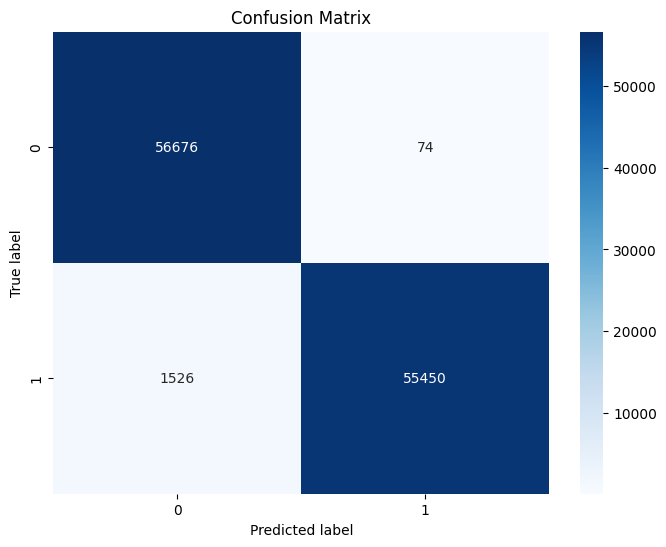

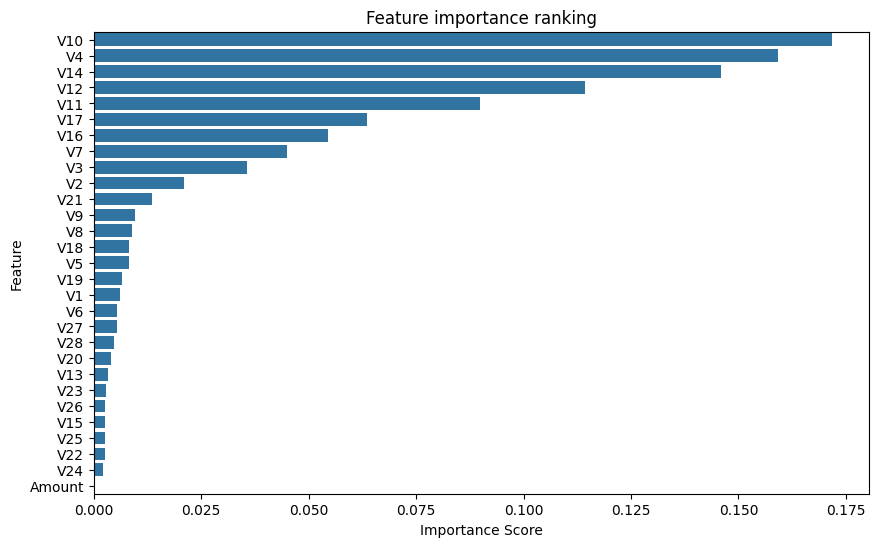

In [3]:
#C-4: Train and Tune Advanced Model

# Initialize advanced model
rf_model= RandomForestClassifier(n_estimators=100,
    max_depth=10, min_samples_split= 5, random_state=42)

# Cross validation
cv_scores= cross_val_score(rf_model, x_train_scaled, y_train, cv=5, scoring='f1')
print("\nCross-validation F1 scores:", cv_scores)
print("Average F1 score:", np.mean(cv_scores))

# Fit the RandomForest model
rf_model.fit(x_train_scaled, y_train)

# Predictions
y_pred= rf_model.predict(x_test_scaled)
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8,6))
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# Feature importance
importances= rf_model.feature_importances_
feature_names= x.columns
feature_imp= pd.DataFrame({'Feature': x.columns, 'Importance': importances}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature importance ranking')
plt.xlabel('Importance Score')
plt.tight_layout
plt.show()



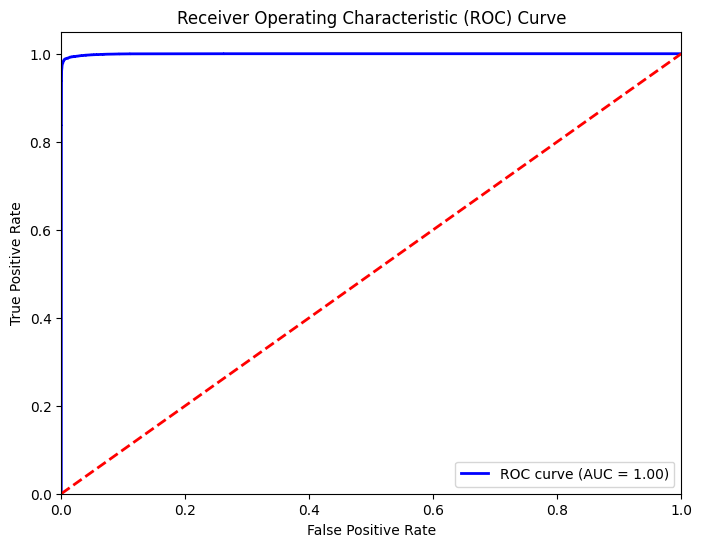

🔎 False Positives (Predicted Fraud, Actually Not Fraud):
              V1        V2        V3        V4        V5        V6        V7  \
122017 -0.029867  0.028362  0.060754  0.003168  0.029098  0.523229 -0.082027   
239313 -0.422414 -0.684895  0.412626  0.046655  1.133297 -0.061352  0.475168   
48571   0.929343 -0.261666  0.355550 -0.073042  0.288098  0.147543  0.418842   
37259   1.037709 -0.276489  0.226908 -0.189424  0.476539  0.316126  0.476563   
52697   0.969962 -0.282350  0.266402 -0.172022  0.394702  0.300267  0.436797   
66646   0.941665 -0.205914  0.796682  0.327189  0.184058  0.180631  0.397890   
149126  1.607905  0.002659 -0.258865  0.734166  1.243847  0.118606  0.805607   
67081   0.889312 -0.213053  0.927891  0.347486  0.154567  0.276164  0.368533   
65152   0.966456 -0.162446  0.506856  0.325092  0.310926 -0.026277  0.542566   
85406  -0.400832 -0.479191  0.031269  0.183699  1.640526 -0.999963  0.358065   

              V8        V9       V10  ...       V22       V23 

In [4]:
#C-5: Generate Final Performance Metrics
# ROC-AUC Curve
y_pred_proba= rf_model.predict_proba(x_test_scaled)[:,1]
fpr, tpr,_= roc_curve(y_test, y_pred_proba)
roc_auc= auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw = 2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='red', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# False Positives
y_pred = rf_model.predict(x_test_scaled)
results = x_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = y_pred

false_positives = results[(results['Predicted'] == 1) & (results['Actual'] == 0)]
print("🔎 False Positives (Predicted Fraud, Actually Not Fraud):")
print(false_positives.head(10))
print(f"\nTotal false positives: {len(false_positives)}")
false_positives.to_csv("false_positives.csv", index=False)


# False Negatives
false_negatives = results[(results['Predicted'] == 0) & (results['Actual'] == 1)]
print("⚠️ False Negatives (Predicted Not Fraud, Actually Fraud):")
print(false_negatives.head(10))
print(f"\nTotal false negatives: {len(false_negatives)}")
false_negatives.to_csv("false_negatives.csv", index=False)


In [5]:
import joblib

# Save trained model
joblib.dump(rf_model, "rf_model.pkl")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler have been saved successfully!")


✅ Model and scaler have been saved successfully!


In [2]:
import pandas as pd
import joblib

# Load dataset (must be the same one you trained on)
df = pd.read_csv("../data/creditcard_2023.csv")

# Load trained model and scaler
rf_model = joblib.load("rf_model.pkl")
scaler = joblib.load("scaler.pkl")

# Assume you have already computed accuracy of the model
model_accuracy = 0.98  # replace with your real accuracy score

print("💬 Welcome to the Fraud Detection Chatbot!")
print("You can enter a Transaction ID, and I will check if it is FRAUD or NOT FRAUD.")
print(f"⚡ THIS AI model has an accuracy of {model_accuracy*100:.2f}%")
print("👉 Type 'exit' anytime to close the chatbot.\n")

while True:
    try:
        # Ask for transaction ID
        user_input = input("Enter Transaction ID (or type 'exit' to quit): ").strip().lower()
        
        if user_input == "exit":
            print("👋 Thank you for using the Fraud Detection Chatbot! Goodbye!")
            break
        
        # Convert input to integer
        transaction_id = int(user_input)
        
        # Find transaction in dataset
        if transaction_id in df['id'].values:
            transaction = df[df['id'] == transaction_id]
            
            # Extract features (drop id and Class, keep DataFrame format!)
            features = transaction.drop(['id', 'Class'], axis=1)
            
            # Scale features
            features_scaled = pd.DataFrame(
                scaler.transform(features),
                columns=features.columns
            )

            # Predict
            prediction = rf_model.predict(features_scaled.values)[0]

            # Get transaction details
            amount = transaction['Amount'].values[0] if 'Amount' in transaction.columns else "N/A"

            # Display results (🚨 or ✅ only, no probability)
            if prediction == 1:
                print(f"🚨 Transaction {transaction_id} | Amount: {amount} | Predicted: FRAUD\n")
            else:
                print(f"✅ Transaction {transaction_id} | Amount: {amount} | Predicted: NOT FRAUD\n")
        
        else:
            print("⚠️ Transaction ID not found. Please try again.\n")
    
    except ValueError:
        print("❌ Invalid input. Please enter a valid Transaction ID or 'exit' to quit.\n")


💬 Welcome to the Fraud Detection Chatbot!
You can enter a Transaction ID, and I will check if it is FRAUD or NOT FRAUD.
⚡ THIS AI model has an accuracy of 98.00%
👉 Type 'exit' anytime to close the chatbot.

✅ Transaction 1 | Amount: 6531.37 | Predicted: NOT FRAUD

✅ Transaction 1 | Amount: 6531.37 | Predicted: NOT FRAUD

👋 Thank you for using the Fraud Detection Chatbot! Goodbye!
